In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [3]:
%matplotlib inline
%config lnlineBackend.figure_formats = {'png', 'retina'}

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

linear model
train_test
metrics

predict
linspace

proba
where 0.5 근접
axvline

predict 없이 proba
log_loss

confusion_matrix : 실제와 예측 구분 

import collections

In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
import collections

iris.target
collections.Counter(iris.target)

Counter({0: 50, 1: 50, 2: 50})

In [9]:
datas = pd.DataFrame(iris.data, columns=iris.feature_names)
datas.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
target = pd.DataFrame(iris.target, columns=["TARGET"])
target.head()

,TARGET
0,0
1,0
2,0
3,0
4,0


In [11]:
t_target= target[:100]
t_datas= datas[:100]

In [14]:
data_pl = t_datas['petal length (cm)'].to_frame()
data_pl

,petal length (cm)
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
95,4.2
96,4.2
97,4.3
98,3.0


이진분류만 가능 하기 때문에 feature 하나만 가지고 0과 1만 설정하기. 
ex) petal length

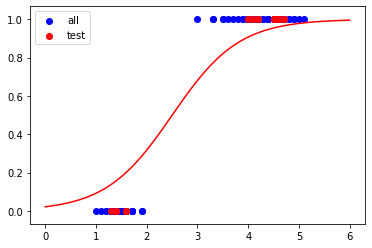

In [15]:
train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(data_pl, t_target)
logreg=LogisticRegression()
logreg.fit(train_x,train_y)
prediction = logreg.predict(test_x)

X_n = np.linspace(0, 6, 1000).reshape(-1, 1)
y_p = logreg.predict_proba(X_n)[:, 1]

plt.scatter(data_pl, t_target, color="blue", label="all")
plt.scatter(test_x, prediction , color="red", label="test")
plt.plot(X_n, y_p, color="red")
plt.legend()

In [16]:
expected = t_target
predicted = logreg.predict(data_pl)

print(classification_report(expected, predicted))
print(confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[50  0]
 [ 0 50]]


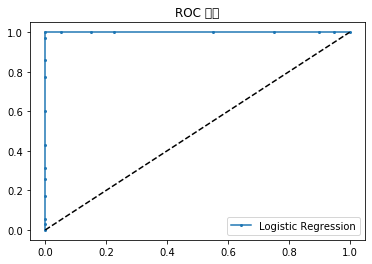

In [17]:
fpr, tpr, thresholds = roc_curve(train_y, logreg.predict_proba(train_x)[:, 1])

plt.plot(fpr, tpr, 'o-', ms=2, label="Logistic Regression")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.title('ROC 커브')
plt.show()

In [18]:
auc(fpr, tpr)

1.0